<h1 style="text-align: center;">Midterm Project</h1>
<h1 style="text-align: center;">Craft Beer Bar Sales Analysis</h1>
<p>(This project study about the sales of a beer bar, which is a saloon in Russia)</p>


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Phần I, II, câu 2 phần III|100%
|Nguyễn Huy Hoàn|20127166|Phần I, II , câu 1 phần III|100%
|Bùi Thanh Lâm|20127402|Phần I, II, câu 2 phần III|100%
|Đào Ngọc Hoa|20127500|Phần I, II , câu 1 phần III|100%
|Võ Thanh Lâm|20127546|Phần I, II, câu 2 phần III|100%

<a class="anchor" id="1"></a>
## I. Collecting data 
**General: Collecting data on Kaggle**


# About Dataset
**Bar history:**
> In the spring of 2016, we decided to open a beer bar that would be fun to return to for many years. To do this, we have done a lot of work. There are 30 taps on the board on the board of interesting beer from European, American and Russian new wave breweries, shelves and refrigerators for three hundred bottles, as well as the best cheese from regional cheese makers. In December of the same year, Nelson Sauvin opened - a spacious and cozy two-story bar with large windows in the very center of Yekaterinburg. The bar is open not only for experimental and Untappd check-ins, but also for Friday hangouts, dates or meeting with grandma. 🎉🎉🎉 In addition, we are engaged in the import of beer, which, in our opinion, is not enough in Russia.

For more information, visit website: https://www.kaggle.com/datasets/podsyp/sales-in-craft-beer-bar

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Products dataset

In [61]:
products_df = pd.read_csv('data/Product_range.csv',index_col='Product_code')
products_df.head(5)

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5
4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0
1340,NaN,1000 IBU Imperial IPA Barrel l,960.0,Liters,NaN,1.000,9.6
4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4302,NaN,18th Street Brewery Deal With The Devil 0.473,630.0,Pieces,USA,0.473,8.5


**The number of rows and columns**

In [4]:
rows, cols = products_df.shape
rows, cols

(5314, 7)

**This bar club have 5314 different products, with their infomation as follow:**

|Atrribute|Meanings
| :------ | ---
|Vendor_code|The time that a student fill the form
|Name|The gender of a student
|Retail_price|The age of a student
|Base_unit|The course that a student is participating
|Country_of_Origin|The current year of a student
|Size|The current GPA of a student
|ABV|Whether a student married or not

In [7]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 5028 to 1682
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vendor_code        4288 non-null   object 
 1   Name               5314 non-null   object 
 2   Retail_price       4878 non-null   float64
 3   Base_unit          4910 non-null   object 
 4   Country_of_Origin  4205 non-null   object 
 5   Size               4626 non-null   float64
 6   ABV                4622 non-null   float64
dtypes: float64(3), object(4)
memory usage: 332.1+ KB


*There are no column having inappropriate data types.*

# Preprocessing

**Values distribution of Numeric columns**

In [62]:
df = products_df.describe().T
df['missing_percentage'] = ((1-df['count']/rows) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Retail_price,4878.0,637.839502,504.895006,1.00,350.00,520.0,730.0,8484.85,8.2
Size,4626.0,0.626917,0.953290,0.15,0.33,0.5,1.0,30.00,12.9
ABV,4622.0,7.074273,2.457970,0.50,5.30,6.5,8.2,21.00,13.0


**Retail_price**

In [37]:
df = products_df[products_df['Retail_price'].isna()]
df.head()

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
4372,NaN,18th Street Brewery,NaN,NaN,USA,NaN,NaN
4602,NaN,Lambik Bar,NaN,NaN,NaN,NaN,NaN
3488,NaN,Honey,NaN,NaN,NaN,NaN,NaN
3041,NaN,2Y,NaN,NaN,NaN,NaN,NaN
4728,4 Brewers,4Brewers,NaN,NaN,Russia,NaN,NaN


In [38]:
df1 = df.describe().T
df1['missing_percentage'] = ((1-df1['count']/len(df)) * 100).round(1)
df1

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Retail_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
Size,6.0,5.568333,11.972822,0.33,0.435,0.875,1.0,30.0,98.6
ABV,5.0,6.940000,1.957805,5.00,5.500,6.900,7.3,10.0,98.9


As we see, with products having null `Retail_price`, the `missing_percentage` of `Size` and `ABV` are quitely high, so we decided to remove these products.

In [39]:
products_df.dropna(subset=['Retail_price'], inplace = True)

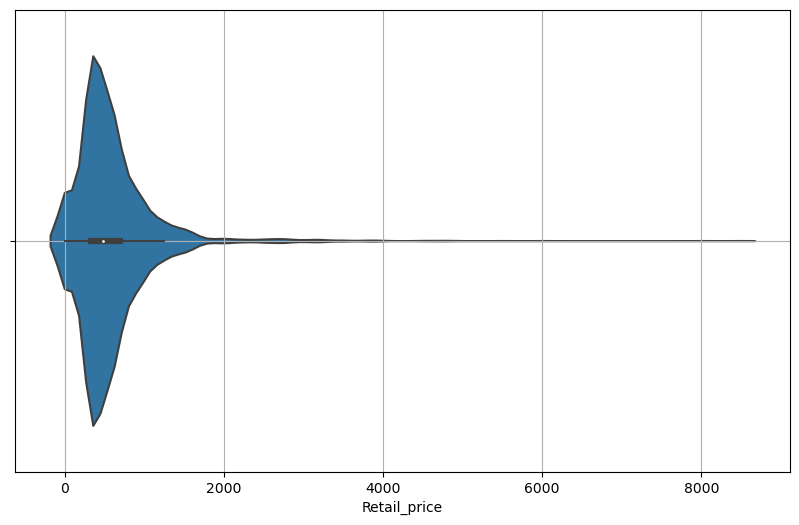

In [67]:
plt.figure(figsize=(10,6))
sns.violinplot(x=products_df['Retail_price'])
plt.grid()
plt.show()

**Values distribution of Numeric columns after removing products having null `Retail_price`**

In [68]:
df = products_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(products_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
Retail_price,5314.0,586.039723,513.833889,1.00,330.00,480.0,700.0,8484.85,0.0
Size,5314.0,1.387301,2.163199,0.15,0.33,0.5,1.0,30.00,0.0
ABV,5314.0,6.999490,2.300451,0.50,5.50,6.5,8.0,21.00,0.0


**Size**

Because our analysis would not care so deeply about this attribute, it is fine.

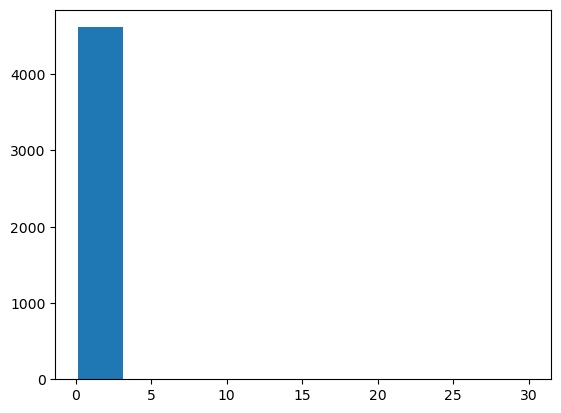

In [51]:
plt.hist(products_df['Size'])
plt.show()

**ABV**

Due to the null value, we decided to replace it by the median.

In [ ]:
products_df.fillna(df.loc['ABV','50%'], inplace = True)

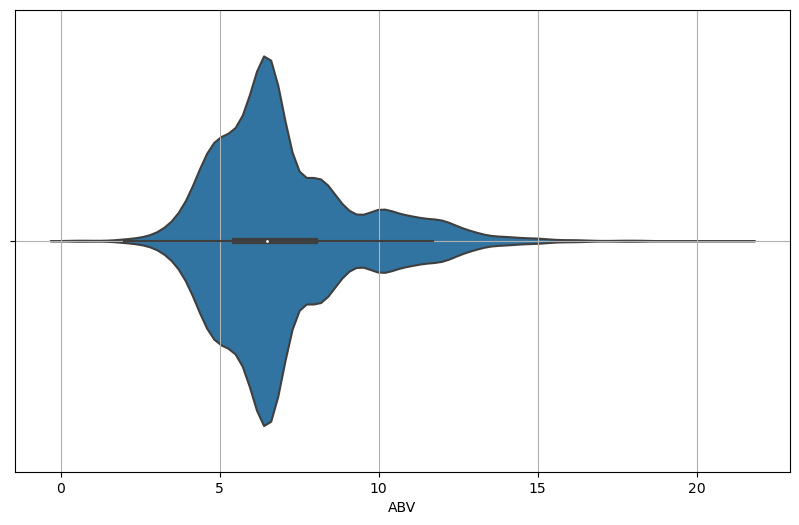

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(x = products_df['ABV'])
plt.grid()
plt.show()

**Values distribution of Catergorial columns**

In [70]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = products_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(products_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Vendor_code,Name,Base_unit,Country_of_Origin
missing_percentage,0.0,0.0,0.0,0.0
num_values,272,5193,5,29
value_percentages,"{6.5: 19.3, 'AF Brew': 4.6, 'To Ol': 2.9, 'Zagovor': 2.8, 'Mikkeller': 2.7, 'Jaws': 2.6, 'BrewDo...","{'NOT RELEVANT': 0.5, 'NOT AVAILABLE': 0.2, 'NOT AVAILABLE / REMAINED': 0.1, 'Kees Barrel Projec...","{'Pieces': 65.9, 'Liters': 26.4, 6.5: 7.6, 'Kilogram': 0.0, '100g': 0.0}","{'Russia': 31.2, 6.5: 20.9, 'USA': 7.5, 'Sweden': 6.6, 'Belgium': 6.4, 'Netherlands': 4.9, 'Denm..."


Overall, it is interesting that the mising percentage of all catergorical columns are 0.0%, and there are no abnormal data we need to consider and preprocess.

## Transactions

In [74]:
transactions_df = pd.read_csv('data/Transactions.csv')
transactions_df

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02
...,...,...,...,...,...,...,...,...
50079,2022-09-18 15:00:00,5316,6.0,1875.95,104.05,1095.95,140.51,5.26
50080,2022-09-18 15:00:00,5317,2.0,555.95,104.05,315.95,131.65,15.77
50081,2022-09-18 15:00:00,5318,2.0,572.50,87.50,312.50,120.19,13.26
50082,2022-09-18 15:00:00,5321,1.0,300.00,NaN,180.00,150.00,NaN


In [75]:
transactions_df['Month'] = pd.to_datetime(transactions_df['Date_and_time_of_unloading']).dt.month

In [76]:
transactions_df['Year'] = pd.to_datetime(transactions_df['Date_and_time_of_unloading']).dt.year

In [100]:
transactions_df['day_of_week'] = pd.to_datetime(transactions_df['Date_and_time_of_unloading']).dt.dayofweek

In [111]:
df = transactions_df.groupby(['Year','Month']).Profit.sum().reset_index()
df

,Year,Month,Profit
0,2020,1,768797.24
1,2020,2,826772.27
2,2020,3,1028780.40
3,2020,4,1020811.37
4,2020,5,1385695.03
5,2020,6,1853970.02
6,2020,7,1436702.70
7,2020,8,1396013.53
8,2020,9,1151005.42
9,2020,10,984324.91


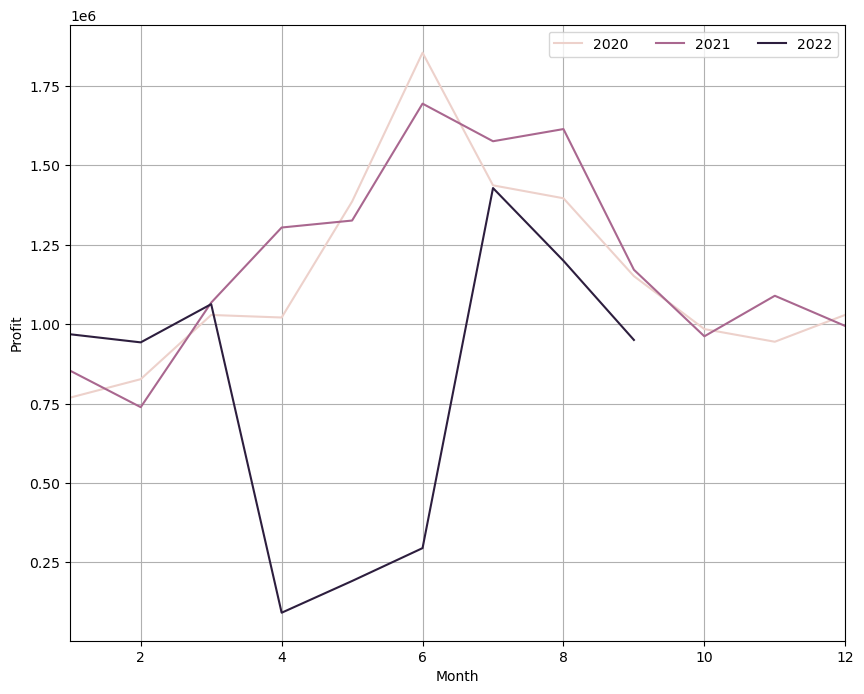

In [112]:
plt.figure(figsize=(10,8))
plt.grid()
sns.lineplot(x="Month", y="Profit",hue = 'Year', data=df)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.xlim(1,12) 
plt.show()

In [101]:
df = transactions_df.groupby(['day_of_week']).Profit.sum().reset_index()
df

,day_of_week,Profit
0,0,3916164.45
1,1,8134871.24
2,2,5027792.99
3,3,3839449.89
4,4,3957453.52
5,5,4174950.93
6,6,6293829.46


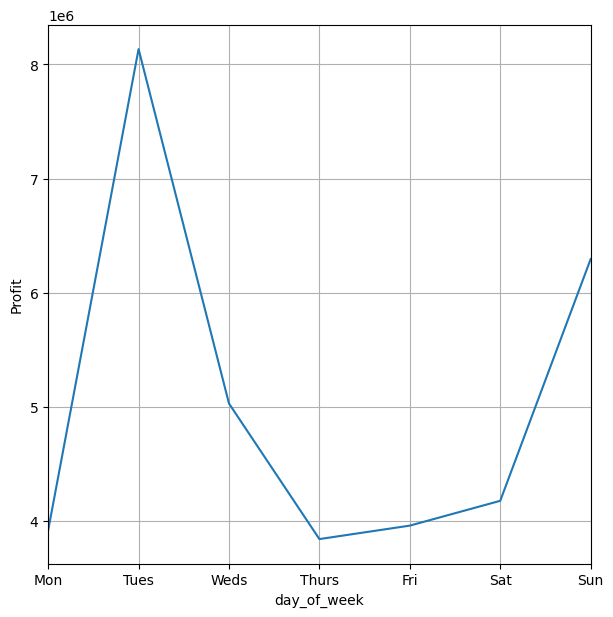

In [109]:
days = ['Mon','Tues','Weds','Thurs','Fri','Sat','Sun']
plt.figure(figsize=(7,7))
plt.grid()
sns.lineplot(x="day_of_week", y="Profit", data=df)
plt.xticks([0, 1, 2,3,4,5,6],days)
plt.xlim(0,6) 
plt.show()

In [22]:
df = transactions_df.groupby(['Year']).Profit.sum().reset_index()
df

,Year,Profit
0,2020,13826545.11
1,2021,14388264.23
2,2022,7129703.14


<AxesSubplot:xlabel='Year', ylabel='Profit'>

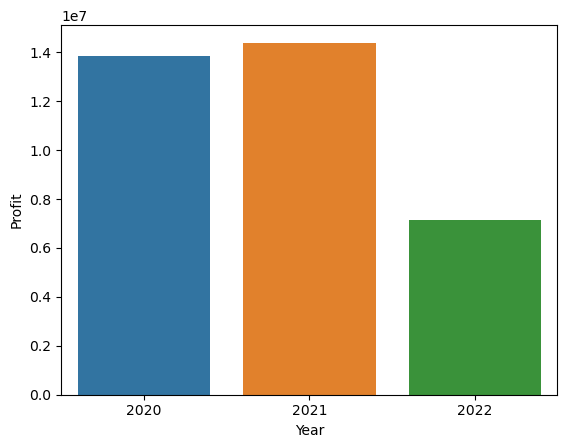

In [23]:
sns.barplot(data=df, x="Year", y="Profit")

In [72]:
df = products_df.reset_index().groupby('Country_of_Origin').Vendor_code.value_counts().reset_index(name='vendors')
df

,Country_of_Origin,Vendor_code,vendors
0,6.5,6.5,921
1,6.5,Mikkeller,84
2,6.5,Red Button,38
3,6.5,Foco,10
4,6.5,Poiret,9
...,...,...,...
308,United Kingdom,Aspall,2
309,United Kingdom,Henney's,2
310,United Kingdom,Black Isle,1
311,United Kingdom,Oakham,1


In [73]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="Product_code",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'Product_code'

<Figure size 1000x800 with 0 Axes>

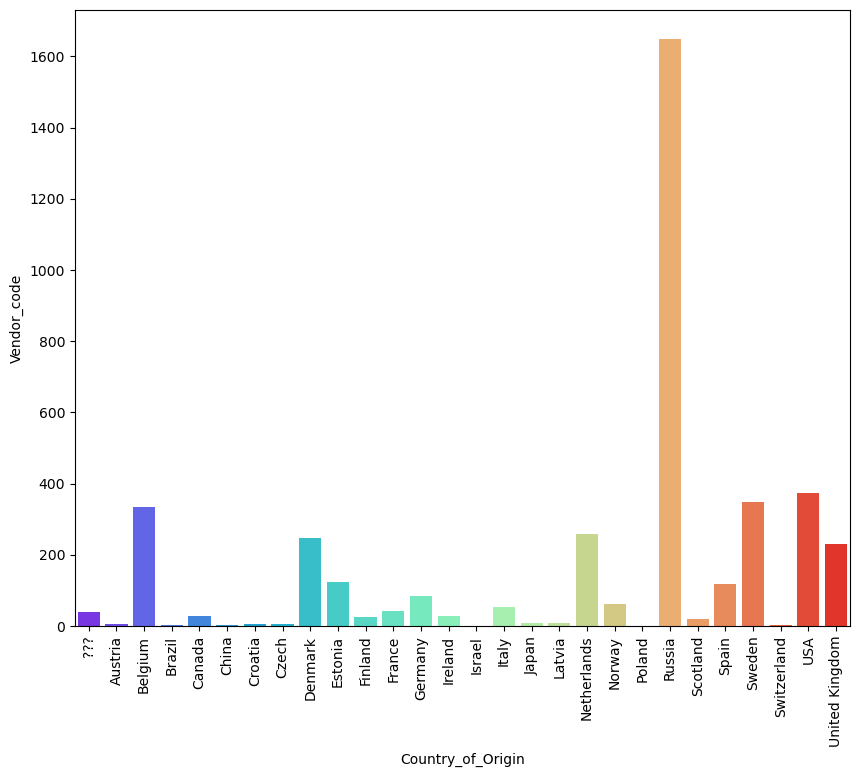

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="Vendor_code",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [41]:
products_df.describe()

,Retail_price,Size,ABV
count,4878.000000,4626.000000,4622.000000
mean,637.839502,0.626917,7.074273
std,504.895006,0.953290,2.457970
min,1.000000,0.150000,0.500000
25%,350.000000,0.330000,5.300000
50%,520.000000,0.500000,6.500000
75%,730.000000,1.000000,8.200000
max,8484.850000,30.000000,21.000000


In [40]:
cat_data = products_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(products_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Vendor_code,Name,Base_unit,Country_of_Origin
missing_percentage,19.3,0.0,7.6,20.9
num_values,271,5193,4,28
value_percentages,"{'AF Brew': 5.7, 'To Ol': 3.6, 'Zagovor': 3.5,...","{'NOT RELEVANT': 0.5, 'NOT AVAILABLE': 0.2, 'N...","{'Pieces': 71.3, 'Liters': 28.6, 'Kilogram': 0...","{'Russia': 39.5, 'USA': 9.4, 'Sweden': 8.3, 'B..."


In [69]:
df = products_df.reset_index().groupby('Country_of_Origin').Vendor_code.unique().reset_index(name='vendors')
df['vendors_count'] = df['vendors'].apply(len)
df


,Country_of_Origin,vendors,vendors_count
0,???,"[The Garage Brewery, nan]",2
1,Austria,[Bevog],1
2,Belgium,"[3Fonteine, Alvinne, nan, Anker, Ardenne, BIIR...",52
3,Brazil,[Shimeji Beer],1
4,Canada,"[Collective Arts, Dieu du Ciel, Flying Monkeys...",4
5,China,[Chang],1
6,Croatia,[Dogma],1
7,Czech,"[nan, Axiom]",2
8,Denmark,"[nan, Amager, Hornbeer, Mikkeller, Red Button,...",7
9,Estonia,"[Jaanihanso, Pohjala, Sori, Ollenaut, Puhaste,...",8


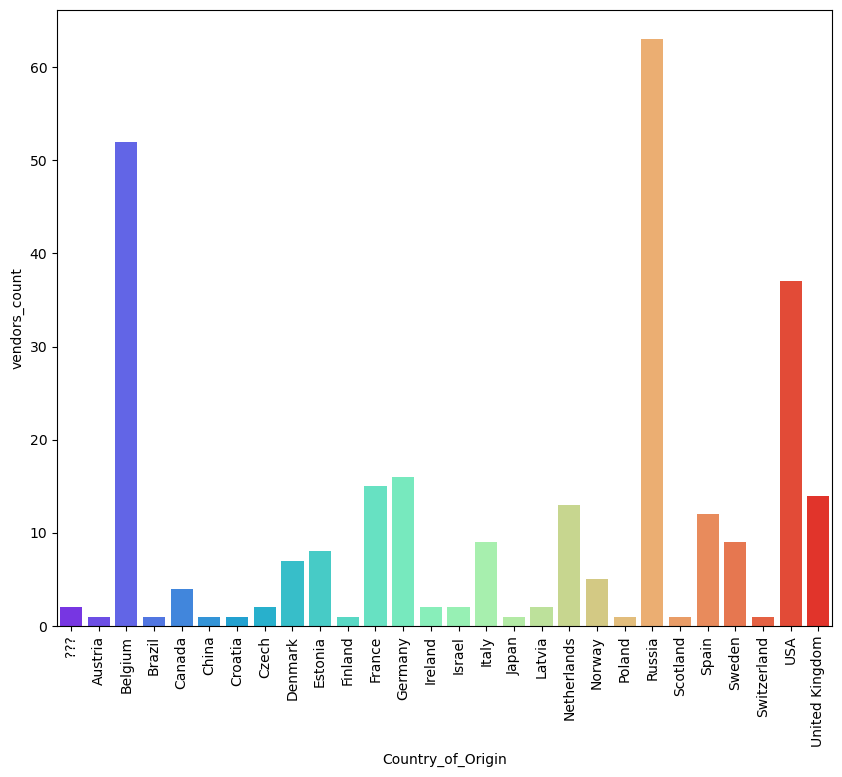

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="vendors_count",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [75]:
big_df = transactions_df.join(products_df, on='Product_code')
big_df

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage,Month,Year,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
0,2020-01-01 23:00:00,144,1.0,280.00,NaN,155.00,124.00,NaN,1,2020,AF Brew,AF Brew Zimnjaja Melanholija Coffee + Vanilla ...,280.0,Pieces,Russia,0.33,10.3
1,2020-01-01 23:00:00,209,2.0,545.73,294.27,75.73,16.11,35.03,1,2020,Pohjala,"Pohjala Mutant Disco / IPA / 6.8% / 0,/ but",420.0,Pieces,Estonia,0.33,6.8
2,2020-01-01 23:00:00,213,2.0,1265.05,34.95,653.05,106.71,2.69,1,2020,Kerisac,Cider Kerisac Cidre Breton Brut Traditionnel /...,650.0,Pieces,France,1.00,6.0
3,2020-01-01 23:00:00,217,1.0,630.00,70.00,220.50,53.85,10.00,1,2020,Savoie,Cider Savoie Cidre of Apples and Pears Brut / ...,870.0,Pieces,France,0.75,4.5
4,2020-01-01 23:00:00,222,2.0,1104.75,195.25,393.75,55.38,15.02,1,2020,Bellot,Cider Bellot Cidre de Cru du Pays d’Othe Brut ...,770.0,Pieces,France,0.75,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50079,2022-09-18 15:00:00,5316,6.0,1875.95,104.05,1095.95,140.51,5.26,9,2022,Saldens,Saldens Tomato Gose vse versii 0.5,330.0,Pieces,Russia,0.50,5.0
50080,2022-09-18 15:00:00,5317,2.0,555.95,104.05,315.95,131.65,15.77,9,2022,Saldens,Saldens American IPA 4C 0.5,330.0,Pieces,Russia,0.50,7.0
50081,2022-09-18 15:00:00,5318,2.0,572.50,87.50,312.50,120.19,13.26,9,2022,Saldens,Saldens Milk Sour Ale Raspberry / Sour Ale Tan...,330.0,Pieces,Russia,0.50,5.0
50082,2022-09-18 15:00:00,5321,1.0,300.00,NaN,180.00,150.00,NaN,9,2022,Steppe & Wind Meadery,Mead Steppe & Wind Cherry Mead 0.33,300.0,Pieces,Russia,0.33,6.0


In [78]:
df = big_df.groupby('Country_of_Origin').Profit.sum().reset_index()
df

,Country_of_Origin,Profit
0,???,110029.49
1,Belgium,2749292.34
2,Brazil,2734.46
3,Canada,53496.79
4,China,11.35
5,Croatia,32906.02
6,Czech,2426.10
7,Denmark,510073.26
8,Estonia,276647.96
9,Finland,24425.20


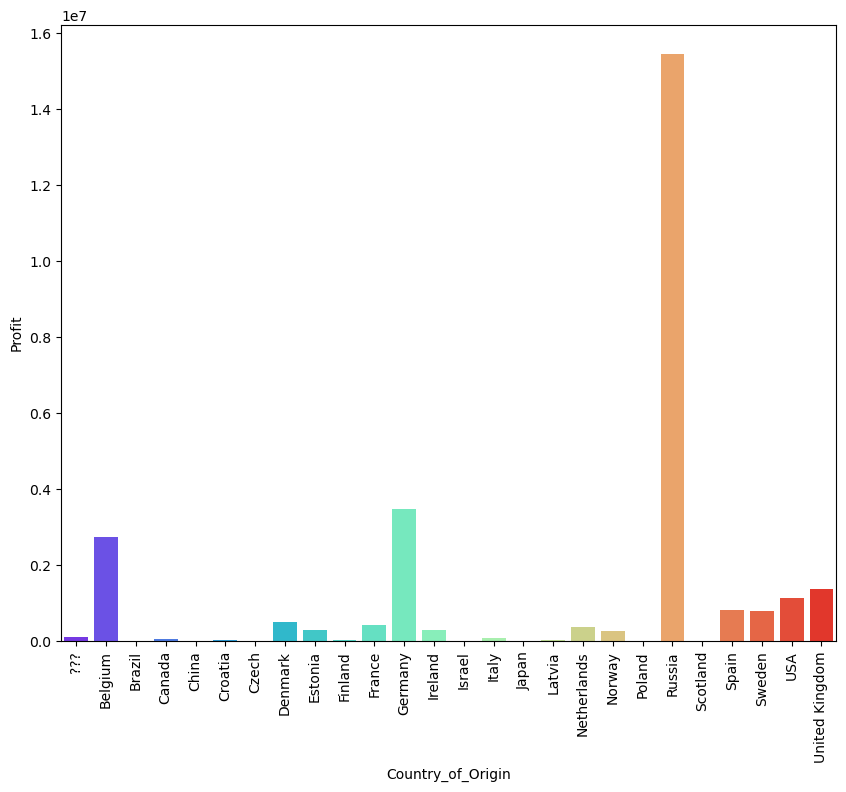

In [79]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [114]:
df = big_df.groupby('Country_of_Origin').Profit.sum().reset_index().sort_values(by=['Profit'])
df

,Country_of_Origin,Profit
4,China,11.35
6,Czech,2426.10
19,Poland,2524.00
21,Scotland,2655.76
2,Brazil,2734.46
15,Japan,5038.52
13,Israel,11398.68
16,Latvia,20823.09
9,Finland,24425.20
5,Croatia,32906.02


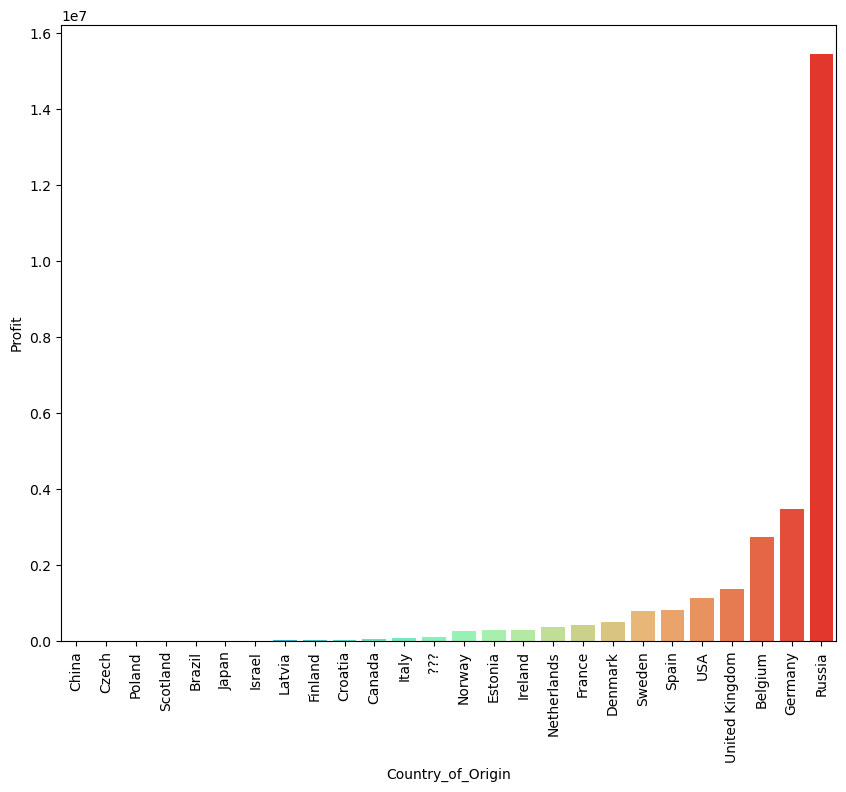

In [115]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Country_of_Origin", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [126]:
a = products_df[products_df['Country_of_Origin'].isin(df[df.Profit>df.Profit.mean()].Country_of_Origin)]

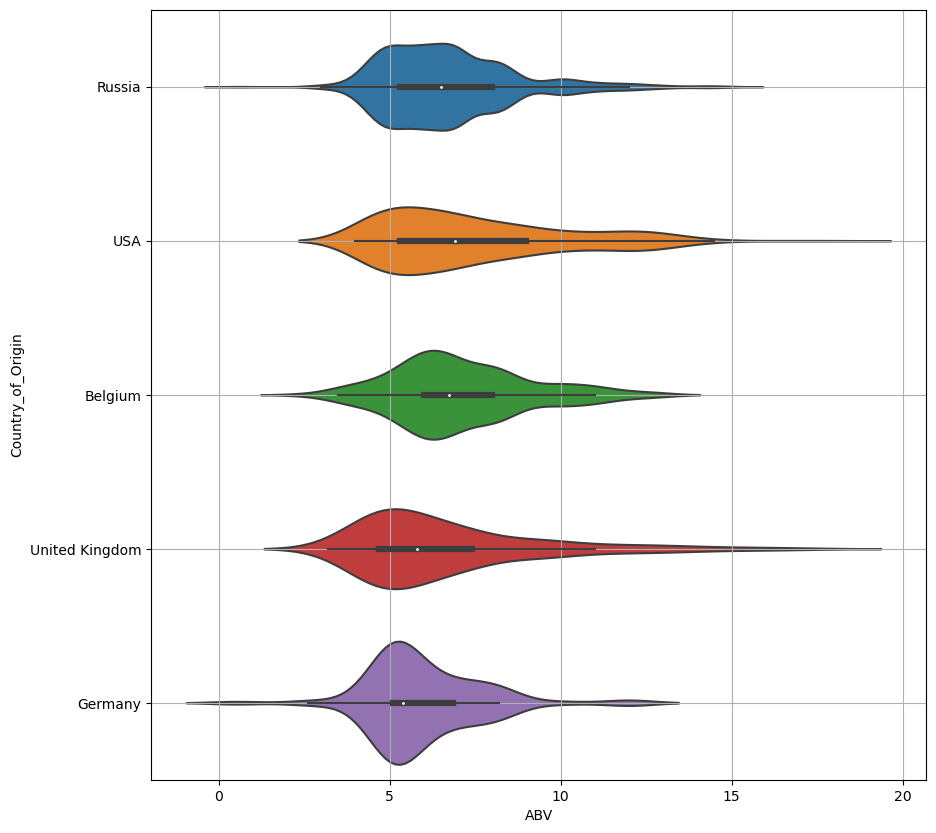

In [128]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="ABV", y="Country_of_Origin")
plt.grid()

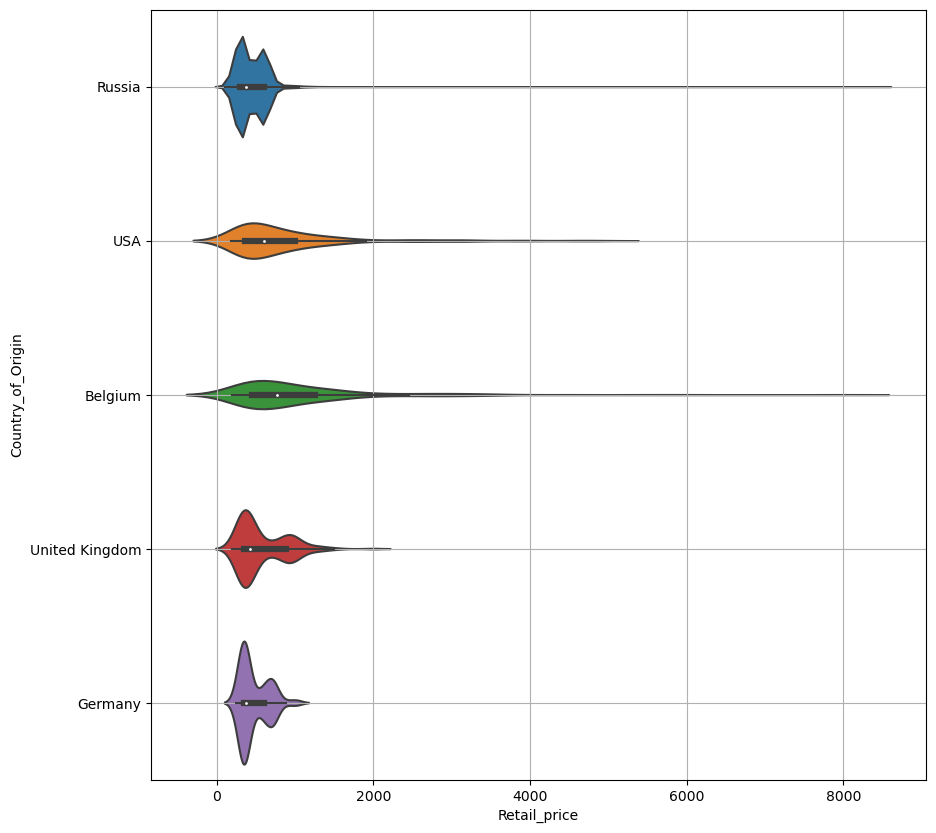

In [129]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="Retail_price", y="Country_of_Origin")
plt.grid()

/home/ngochoa/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


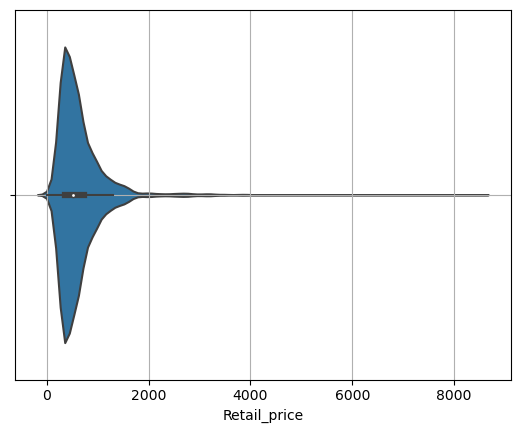

In [132]:
sns.violinplot(products_df["Retail_price"])
plt.grid()

In [96]:
a=df[df['Profit'] < 0].Vendor_code.to_list()
a

['Finback', 'Christian Drouin', 'High Water', 'Templars', 'Toccalmatto']

In [97]:
big_df['Vendor_code'].isin(a)

0        False
1        False
2        False
3        False
4        False
         ...  
50079    False
50080    False
50081    False
50082    False
50083    False
Name: Vendor_code, Length: 50084, dtype: bool

In [98]:
big_df[big_df['Vendor_code'].isin(a)]

,Date_and_time_of_unloading,Product_code,Amount,Sale_amount,Discount_amount,Profit,Percentage_markup,Discount_percentage,Month,Year,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
24,2020-01-01 23:00:00,888,1.0,990.00,110.00,-160.00,-13.91,10.00,1,2020,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.75,4.5
240,2020-01-04 16:00:00,888,1.0,1100.00,NaN,-50.00,-4.35,NaN,1,2020,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.75,4.5
328,2020-01-05 16:00:00,888,1.0,1100.00,NaN,-50.00,-4.35,NaN,1,2020,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.75,4.5
414,2020-01-06 16:00:00,888,1.0,900.00,NaN,-250.00,-21.74,NaN,1,2020,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.75,4.5
646,2020-01-09 21:00:00,888,1.0,1100.00,NaN,-50.00,-4.35,NaN,1,2020,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.75,4.5
1193,2020-01-18 16:00:00,888,2.0,1760.00,440.00,-540.00,-23.48,20.00,1,2020,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.75,4.5
2585,2020-02-08 16:00:00,125,1.0,210.00,90.00,-85.00,-28.81,30.00,2,2020,Toccalmatto,"Toccalmatto Ryevolution / double saison / 8,8%...",300.0,Pieces,Italy,0.33,8.8
6289,2020-04-03 17:00:00,125,1.0,239.93,60.07,-55.07,-18.67,20.02,4,2020,Toccalmatto,"Toccalmatto Ryevolution / double saison / 8,8%...",300.0,Pieces,Italy,0.33,8.8
7413,2020-04-15 20:00:00,125,1.0,269.44,30.56,-25.56,-8.66,10.19,4,2020,Toccalmatto,"Toccalmatto Ryevolution / double saison / 8,8%...",300.0,Pieces,Italy,0.33,8.8
27706,2021-01-19 18:00:00,3102,1.0,10.00,1440.00,-770.00,-98.72,99.31,1,2021,Finback,Finback Definitely Seriously 0.48,1450.0,Pieces,USA,0.48,8.2


In [99]:
products_df[products_df['Vendor_code'].isin(a)]

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
888,Christian Drouin,Christian Drouin Cidre Bouche Brut de Normandi...,1100.0,Pieces,France,0.750,4.5
5155,Templars,Cider dry Templars Normandy Dry Pure Juice Cid...,660.0,Pieces,NaN,0.500,6.0
3102,Finback,Finback Definitely Seriously 0.48,1450.0,Pieces,USA,0.480,8.2
3104,Finback,Finback Floating Weightless 0.5 Bottle,1700.0,Pieces,USA,0.500,6.5
3101,Finback,Finback Once Twice Three Times A Wale 0.48,1450.0,Pieces,USA,0.480,8.2
3100,Finback,"Finback People Power 0,48",1450.0,Pieces,USA,0.480,7.3
3105,Finback,Finback x Voodoo Brewery - Hazy Afternoon 0.48,1450.0,Pieces,USA,0.480,5.5
3103,Finback,Finback Zero Point 0.48,1450.0,Pieces,USA,0.480,6.0
743,High Water,"High Water Ramble on Rose / sour/wild ale / 6,...",1600.0,Pieces,USA,0.473,6.0


In [133]:
df = big_df.groupby('Vendor_code').Profit.sum().reset_index().sort_values(by=['Profit'])
df

,Vendor_code,Profit
92,Finback,-3194.48
61,Christian Drouin,-1100.00
117,High Water,-865.00
195,Templars,-609.74
203,Toccalmatto,-165.63
...,...,...
181,Sobolev,1126597.60
226,Zagovor,1390965.87
216,Weihenstephaner,1581440.48
3,AF Brew,1793918.51


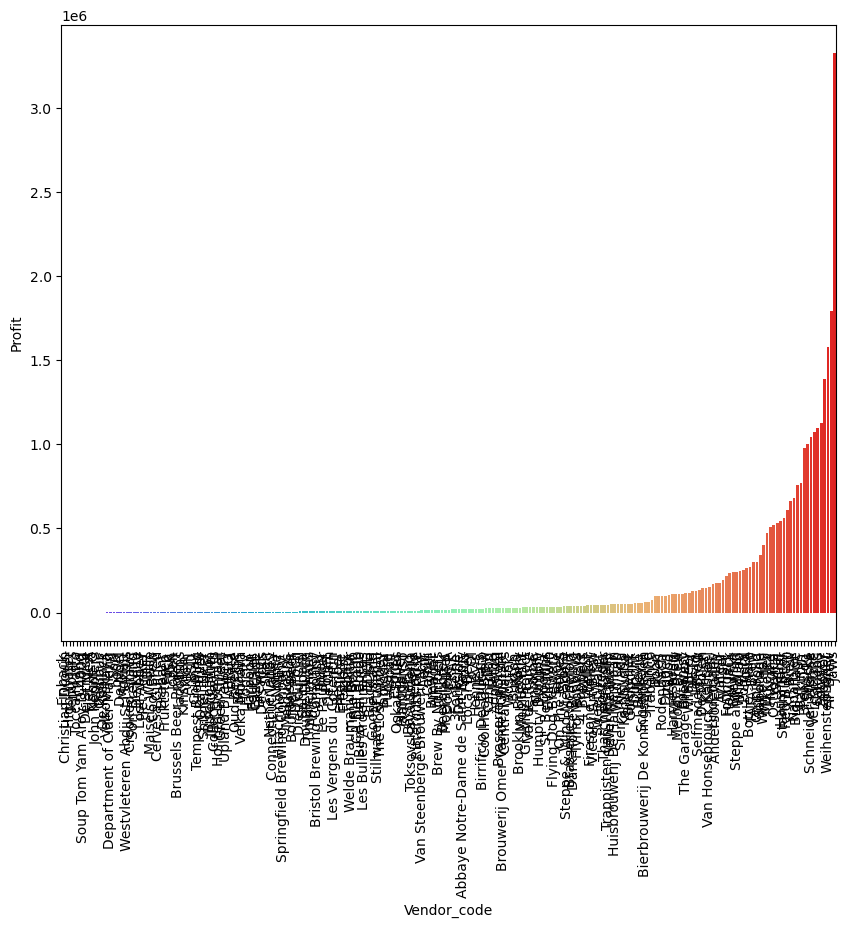

In [134]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Vendor_code", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

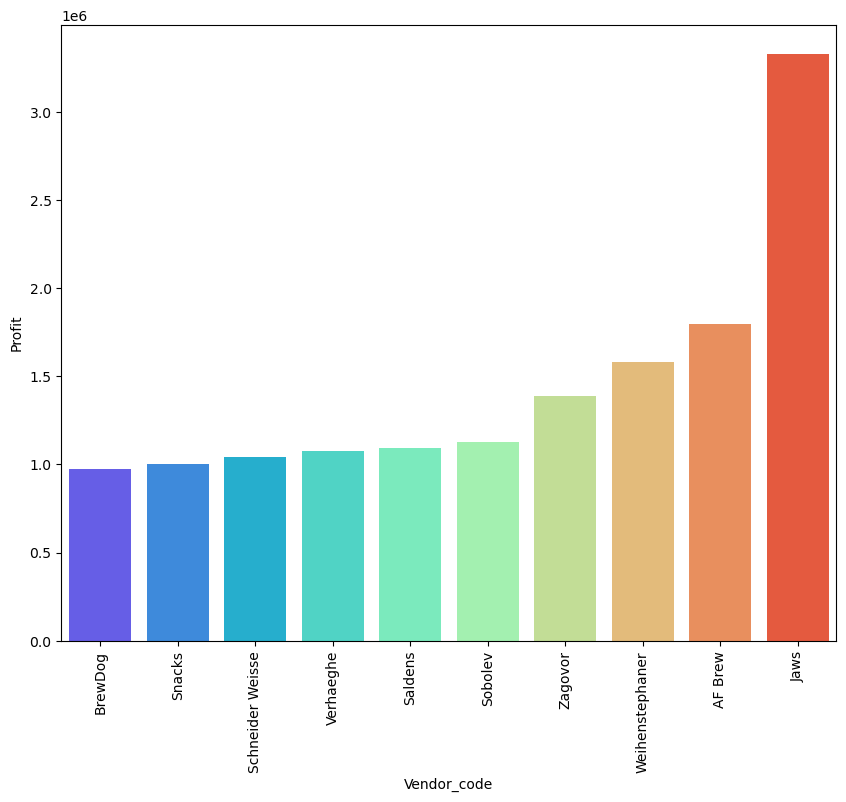

In [158]:
plt.figure(figsize=(10,8))
sns.barplot(data=df.tail(10), x="Vendor_code", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [161]:
a = products_df[products_df['Vendor_code'].isin(df.tail(5).Vendor_code)]
a

,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Product_code,,,,,,,
906,AF Brew,AF & Puhaste IMPERIAL Extra Double Stout/Imper...,1120.0,Liters,Russia,1.00,10.0
62,AF Brew,AF Brew,NaN,NaN,Russia,NaN,NaN
2483,AF Brew,"AF Brew & De Molen Kupola & Pastila 0,33",300.0,Pieces,Russia,0.33,10.0
2410,AF Brew,"AF Brew & Kees High On Vitamin Sea 11,8%",1200.0,Liters,Russia,1.00,11.8
2409,AF Brew,"AF Brew & Kees High On Vitamin Sea 11,8% 0,33",500.0,Pieces,Russia,0.33,11.8
...,...,...,...,...,...,...,...
2605,Zagovor,"ZAGOVOR x SPUTNIK 1985 Smutnoe Vremja 0,5 Can",350.0,Pieces,Russia,0.50,6.5
1449,Zagovor,ZAGOVOR EGOR TAPTAKEOVER BarrelI,600.0,Liters,Russia,1.00,6.0
5097,Zagovor,ZAGOVOR Konsajder Mi vis Dark Berries,880.0,Liters,Russia,1.00,7.0


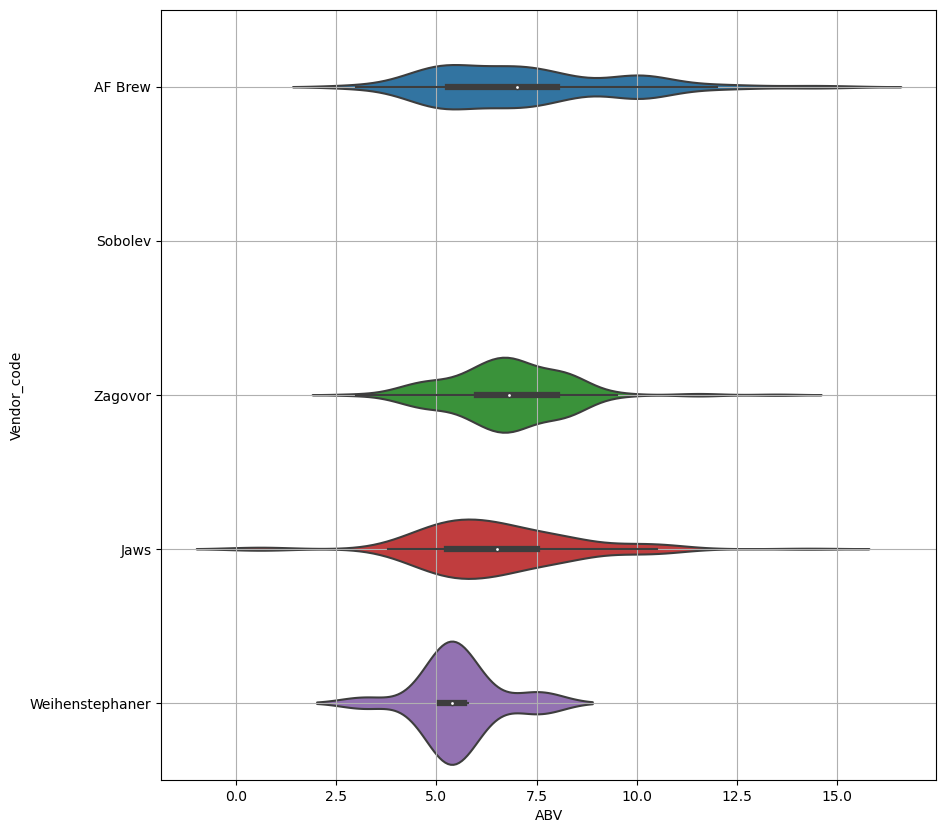

In [145]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="ABV", y="Vendor_code")
plt.grid()

In [149]:
a.reset_index().groupby('Vendor_code').count()

,Product_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV
Vendor_code,,,,,,,
AF Brew,245,245,242,243,245,241,241
Jaws,137,137,135,135,131,130,130
Sobolev,10,10,9,10,10,0,0
Weihenstephaner,18,18,17,17,17,15,15
Zagovor,149,149,147,147,149,144,144


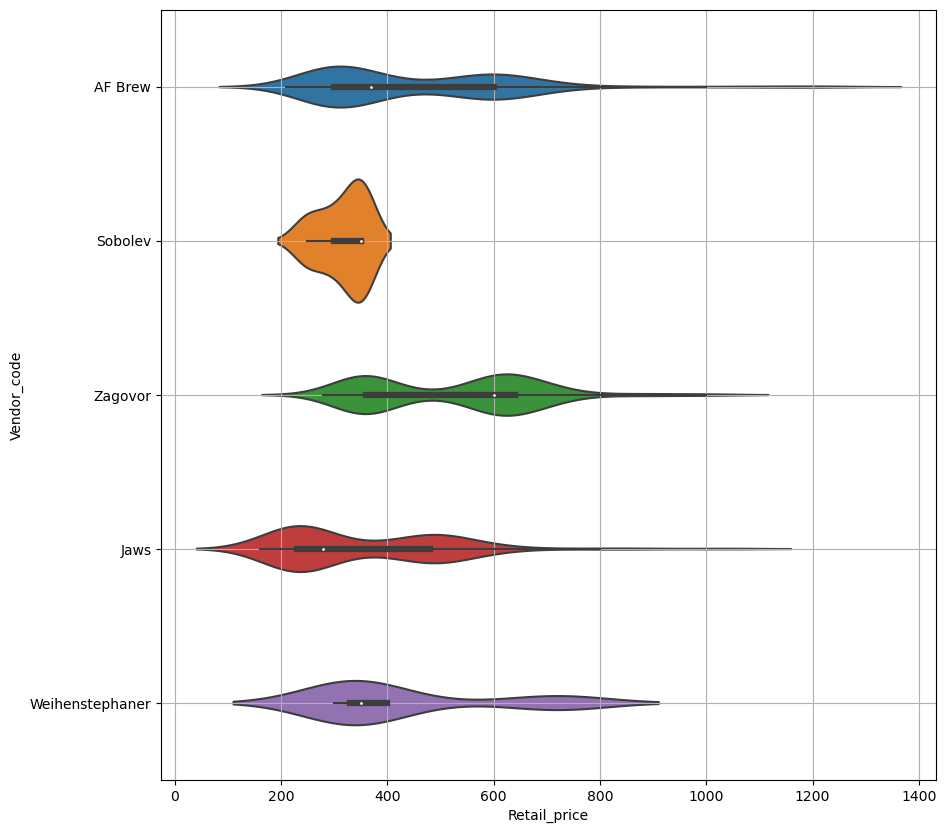

In [147]:
plt.figure(figsize=(10,10))
sns.violinplot(data=a, x="Retail_price", y="Vendor_code")
plt.grid()

In [159]:
df = big_df[big_df['Country_of_Origin']=='Russia'].groupby('Vendor_code').Profit.sum().reset_index().sort_values('Profit')

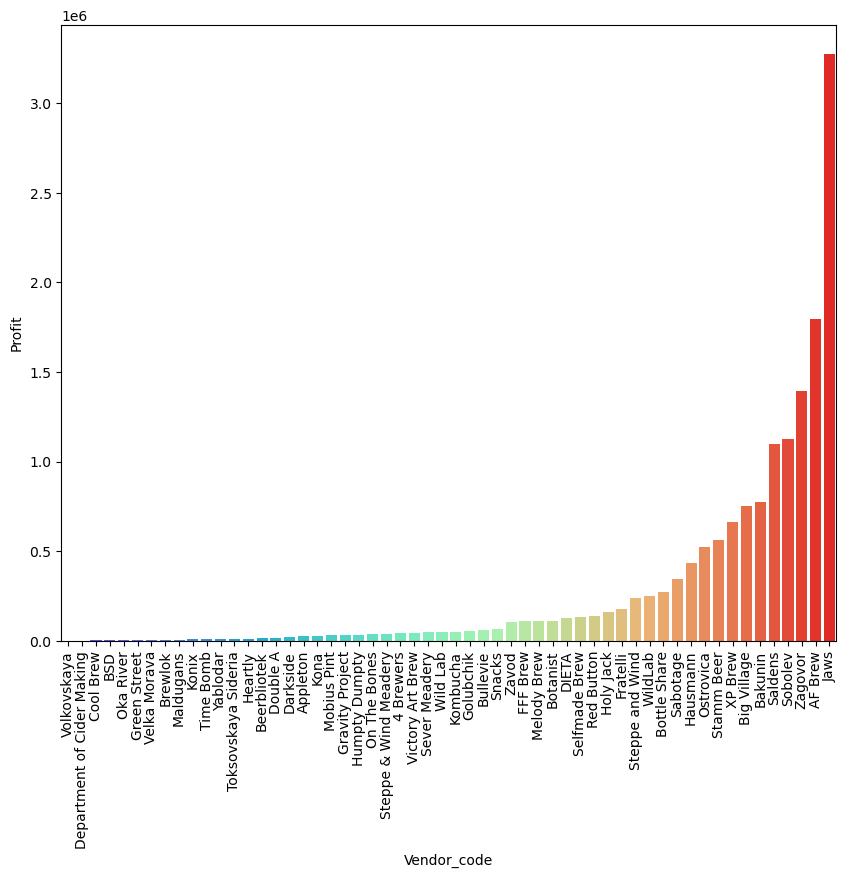

In [160]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Vendor_code", y="Profit",palette='rainbow')
plt.xticks(rotation=90)
plt.show()